# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

requests.get(btc_url)

# Fetch current ETH price

requests.get(eth_url)

# Compute current value of my crpto
# [200] response means good code.

btc = requests.get(btc_url)
eth = requests.get(eth_url)
data_btc = btc.json()
data_eth = eth.json()
data_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18739875,
   'total_supply': 18739875,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 32156.0,
     'volume_24h': 45773755910,
     'market_cap': 603132505432,
     'percentage_change_1h': -1.97847050006115,
     'percentage_change_24h': -5.91779810200792,
     'percentage_change_7d': -17.8610056462345,
     'percent_change_1h': -1.97847050006115,
     'percent_change_24h': -5.91779810200792,
     'percent_change_7d': -17.8610056462345},
    'CAD': {'price': 39937.752,
     'volume_24h': 56851004840.22,
     'market_cap': 749090571746.544,
     'percent_change_1h': -1.97847050006115,
     'percent_change_24h': -5.91779810200792,
     'percent_change_7d': -17.8610056462345}},
   'last_updated': 1624274688}},
 'metadata': {'timestamp': 1624274688,
  'num_cryptocurrencies': 1282,
  'error': None}}

In [6]:
data_btc.keys()

dict_keys(['data', 'metadata'])

In [7]:
data_btc["data"].keys()

dict_keys(['1'])

In [8]:
data_btc["data"] ["1"]

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'website_slug': 'bitcoin',
 'rank': 1,
 'circulating_supply': 18739875,
 'total_supply': 18739875,
 'max_supply': 21000000,
 'quotes': {'USD': {'price': 32156.0,
   'volume_24h': 45773755910,
   'market_cap': 603132505432,
   'percentage_change_1h': -1.97847050006115,
   'percentage_change_24h': -5.91779810200792,
   'percentage_change_7d': -17.8610056462345,
   'percent_change_1h': -1.97847050006115,
   'percent_change_24h': -5.91779810200792,
   'percent_change_7d': -17.8610056462345},
  'CAD': {'price': 39937.752,
   'volume_24h': 56851004840.22,
   'market_cap': 749090571746.544,
   'percent_change_1h': -1.97847050006115,
   'percent_change_24h': -5.91779810200792,
   'percent_change_7d': -17.8610056462345}},
 'last_updated': 1624274688}

In [9]:
data_btc["data"]["1"]["quotes"]

{'USD': {'price': 32156.0,
  'volume_24h': 45773755910,
  'market_cap': 603132505432,
  'percentage_change_1h': -1.97847050006115,
  'percentage_change_24h': -5.91779810200792,
  'percentage_change_7d': -17.8610056462345,
  'percent_change_1h': -1.97847050006115,
  'percent_change_24h': -5.91779810200792,
  'percent_change_7d': -17.8610056462345},
 'CAD': {'price': 39937.752,
  'volume_24h': 56851004840.22,
  'market_cap': 749090571746.544,
  'percent_change_1h': -1.97847050006115,
  'percent_change_24h': -5.91779810200792,
  'percent_change_7d': -17.8610056462345}}

In [10]:
data_btc["data"]["1"]["quotes"].keys()

dict_keys(['USD', 'CAD'])

In [11]:
data_btc["data"]["1"]["quotes"]['CAD']

{'price': 39937.752,
 'volume_24h': 56851004840.22,
 'market_cap': 749090571746.544,
 'percent_change_1h': -1.97847050006115,
 'percent_change_24h': -5.91779810200792,
 'percent_change_7d': -17.8610056462345}

In [12]:
data_btc["data"]["1"]["quotes"]['CAD']['price']
btc_price = data_btc["data"]["1"]["quotes"]['CAD']['price']
btc_price

39937.752

In [13]:
data_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116380525,
   'total_supply': 116380525,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1925.46,
     'volume_24h': 32919712031,
     'market_cap': 224817028341,
     'percentage_change_1h': -3.96020417417576,
     'percentage_change_24h': -8.18031021733356,
     'percentage_change_7d': -23.5253201762786,
     'percent_change_1h': -3.96020417417576,
     'percent_change_24h': -8.18031021733356,
     'percent_change_7d': -23.5253201762786},
    'CAD': {'price': 2391.42132,
     'volume_24h': 40886282342.502,
     'market_cap': 279222749199.522,
     'percent_change_1h': -3.96020417417576,
     'percent_change_24h': -8.18031021733356,
     'percent_change_7d': -23.5253201762786}},
   'last_updated': 1624274693}},
 'metadata': {'timestamp': 1624274693,
  'num_cryptocurrencies': 1282,
  'error': None}}

In [14]:
data_eth.keys()

dict_keys(['data', 'metadata'])

In [15]:
data_eth["data"].keys()

dict_keys(['1027'])

In [16]:
data_eth["data"]["1027"].keys()

dict_keys(['id', 'name', 'symbol', 'website_slug', 'rank', 'circulating_supply', 'total_supply', 'max_supply', 'quotes', 'last_updated'])

In [17]:
data_eth["data"]["1027"]["quotes"]["CAD"]["price"]

2391.42132

In [18]:
eth_price = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
eth_price

2391.42132

In [19]:
# Print current crypto wallet balance

btc_value = btc_price * my_btc
eth_value = eth_price * my_eth

print(f"The current value of your BTC is ${btc_value:0.2f}")
print(f"The current value of your ETH is ${eth_value:0.2f}")

The current value of your BTC is $47925.30
The current value of your ETH is $12674.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [21]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")


alpaca_secret_api_key = os.getenv("ALPACA_SECRET_KEY")


print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_api_key)}")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_api_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [22]:
import datetime

In [23]:
# Format current date as ISO format

today = datetime.date.today()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_portfolio_1000 = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1000).df

# Preview DataFrame

df_portfolio_1000

AGG                                          \
                              open      high      low    close      volume   
time                                                                         
2017-06-28 00:00:00-04:00  109.850  109.8800  109.680  109.850  12016805.0   
2017-06-29 00:00:00-04:00  109.530  109.6800  109.465  109.640   2457876.0   
2017-06-30 00:00:00-04:00  109.620  109.6273  109.460  109.490   2201175.0   
2017-07-03 00:00:00-04:00  109.300  109.3000  109.010  109.080   1681516.0   
2017-07-05 00:00:00-04:00  109.080  109.1800  109.000  109.150   2694196.0   
...                            ...       ...      ...      ...         ...   
2021-06-14 00:00:00-04:00  115.180  115.1800  114.935  114.970   2999623.0   
2021-06-15 00:00:00-04:00  114.900  115.0200  114.870  114.995   5842592.0   
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.630   7527672.0   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.990   7417691.0   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.290   5438261.0   

                              SPY                                         
                             open      high      low   close      volume  
time                                                                      
2017-06-28 00:00:00-04:00     NaN       NaN      NaN     NaN         NaN  
2017-06-29 00:00:00-04:00  243.66  243.7200  239.955  241.39  87799860.0  
2017-06-30 00:00:00-04:00  242.26  242.7100  241.575  241.77  50347309.0  
2017-07-03 00:00:00-04:00  242.91  243.3800  242.290  242.32  27234078.0  
2017-07-05 00:00:00-04:00  242.62  243.0100  241.700  242.77  41067682.0  
...                           ...       ...      ...     ...         ...  
2021-06-14 00:00:00-04:00  424.43  425.2900  423.100  425.29  33128340.0  
2021-06-15 00:00:00-04:00  425.43  425.4600  423.540  424.50  42885806.0  
2021-06-16 00:00:00-04:00  424.63  424.8700  419.920  422.12  73638324.0  
2021-06-17 00:00:00-04:00  421.67  423.0200  419.320  421.97  71991686.0  
2021-06-18 00:00:00-04:00  417.08  417.8281  414.700  415.01  92753385.0  

[1001 rows x 10 columns]

In [24]:
# Pick AGG and SPY close prices 
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio_1000["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_1000["SPY"]["close"]
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices

,AGG,SPY
2017-06-28,109.850,NaN
2017-06-29,109.640,241.39
2017-06-30,109.490,241.77
2017-07-03,109.080,242.32
2017-07-05,109.150,242.77
...,...,...
2021-06-14,114.970,425.29
2021-06-15,114.995,424.50
2021-06-16,114.630,422.12
2021-06-17,114.990,421.97


In [25]:
# Compute the current value of shares

agg_price = df_closing_prices["AGG"]
current_agg_price = agg_price.iloc[-1]
current_value_agg = current_agg_price * my_agg

spy_price = df_closing_prices["SPY"]
current_spy_price = spy_price.iloc[-1]
current_value_spy = current_spy_price * my_spy

# Print current value of shares

print(f"The current value of your {my_agg} AGG shares is ${current_value_agg:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${current_value_spy:0.2f}")

The current value of your 200 AGG shares is $23058.00
The current value of your 50 SPY shares is $20750.50


### Savings Health Analysis

In [26]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

total_crypto_holdings = btc_value + eth_value
total_share_holdings = current_value_agg + current_value_spy

  
# Create DataFrame  

data_frame = {"Amount": [total_crypto_holdings, total_share_holdings]}
tickers = ["Crypto", "Shares"]

# Print the output.  

data_frame

# Create savings DataFrame

df_savings = pd.DataFrame(data_frame, index=tickers)


# Display savings DataFrame

df_savings


,Amount
Crypto,60599.835396
Shares,43808.500000


<AxesSubplot:title={'center':'Savings health analysis'}, ylabel='Amount'>

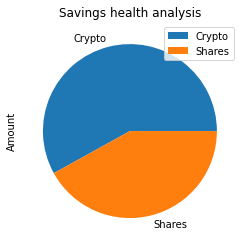

In [27]:
# Plot savings pie chart

df_savings.plot.pie(y="Amount", title="Savings health analysis")

In [28]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3
emergency_fund

36000

In [29]:
# Calculate total amount of savings

total_savings = total_crypto_holdings + total_share_holdings
total_savings

104408.33539600001

In [30]:
# Validate saving health

if total_savings > emergency_fund:
    print("Well done! Your total savings is higher than the emergency fund. Keep up the great savings")
elif total_savings == emergency_fund:
    print("Well done! You have saved enough money to match the emergency fund. Keep up the great savings")
elif total_savings < emergency_fund: 
    print(f"You're almost there! You need to save ${total_savings - emergency_fund}")

Well done! Your total savings is higher than the emergency fund. Keep up the great savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [31]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG



# (use a limit=1000 parameter to call the most recent 1000 days of data)


# Display sample data


df_stock_data.head()

NameError: name 'df_stock_data' is not defined

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")